# F1 Lap Time Prediction - Model Training

This notebook demonstrates the training of a base model for predicting F1 lap times based on various features.

## 1. Setup and Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import joblib
import os

# Set random seed for reproducibility
np.random.seed(42)

# Set plot style
# plt.style.use('seaborn')
sns.set_palette('husl')

## 2. Data Loading and Preprocessing

In [3]:
# Load the cleaned data
data_path = '../data/processed/f1_2023_cleaned.csv'
df = pd.read_csv(data_path)

# Display basic information
print(f"Dataset shape: {df.shape}")
print("\nFirst few rows:")
display(df.head())
print("\nData types:")
display(df.dtypes)
print("\nMissing values:")
display(df.isnull().sum())

Dataset shape: (33198, 43)

First few rows:


C:\Users\prath\AppData\Local\Temp\ipykernel_5156\1795521103.py:3: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path)


,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,SpeedI2_Diff,SpeedFL_Diff,SpeedST_Diff,PitStopDuration,PitLap,StintLength,SectorSum,LapTimeDelta,PositionChange,StintNumber
0,1081.997,VER,1,94.247,1,1.0,956.201,NaN,30.62343,44.778,...,NaN,NaN,NaN,NaN,True,26,124.87043,NaN,NaN,1
1,1175.532,VER,1,93.535,2,1.0,NaN,NaN,28.53400,36.657,...,NaN,NaN,NaN,NaN,False,26,93.53500,-0.712,NaN,1
2,1267.677,VER,1,92.145,3,1.0,NaN,NaN,28.44100,36.572,...,-2.0,-1.0,-1.0,NaN,False,26,92.14500,-1.390,NaN,1
3,1425.559,VER,1,157.864,4,1.0,NaN,NaN,48.38700,69.690,...,-44.0,-1.0,-162.0,NaN,False,26,157.86400,65.719,NaN,1
4,1516.278,VER,1,90.719,5,1.0,NaN,NaN,28.10900,36.109,...,46.0,3.0,162.0,NaN,False,26,90.71900,-67.145,NaN,1



Data types:


Time                  float64
Driver                 object
DriverNumber            int64
LapTime               float64
LapNumber               int64
Stint                 float64
PitOutTime            float64
PitInTime             float64
Sector1Time           float64
Sector2Time           float64
Sector3Time           float64
Sector1SessionTime    float64
Sector2SessionTime    float64
Sector3SessionTime    float64
SpeedI1               float64
SpeedI2               float64
SpeedFL               float64
SpeedST               float64
IsPersonalBest           bool
Compound               object
TyreLife                int64
FreshTyre                bool
Team                   object
LapStartTime          float64
TrackStatus            object
Position              float64
Deleted                  bool
FastF1Generated          bool
IsAccurate               bool
Event                  object
Year                    int64
Session                object
SpeedI1_Diff          float64
SpeedI2_Di


Missing values:


Time                      0
Driver                    0
DriverNumber              0
LapTime                   0
LapNumber                 0
Stint                     0
PitOutTime            30102
PitInTime             30091
Sector1Time               0
Sector2Time               0
Sector3Time               0
Sector1SessionTime     2424
Sector2SessionTime      211
Sector3SessionTime      599
SpeedI1                4537
SpeedI2                2460
SpeedFL                4928
SpeedST                3642
IsPersonalBest            0
Compound                  0
TyreLife                  0
FreshTyre                 0
Team                      0
LapStartTime              0
TrackStatus               0
Position               7813
Deleted                   0
FastF1Generated           0
IsAccurate                0
Event                     0
Year                      0
Session                   0
SpeedI1_Diff           8573
SpeedI2_Diff           4752
SpeedFL_Diff           7805
SpeedST_Diff        

## 3. Feature Engineering

In [4]:
# Define features and target
target = 'LapTime'

# Select features for the base model
features = [
    # Basic lap information
    'LapNumber', 'Stint', 'StintNumber', 'StintLength',
    
    # Sector times
    'Sector1Time', 'Sector2Time', 'Sector3Time', 'SectorSum',
    
    # Speed data
    'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST',
    
    # Tire information
    'TyreLife', 'Compound', 'FreshTyre',
    
    # Position and track status
    'Position', 'PositionChange', 'TrackStatus',
    
    # Lap characteristics
    'PitLap', 'LapTimeDelta'
]

# Create feature matrix and target vector
X = df[features]
y = df[target]

# Handle categorical variables
X = pd.get_dummies(X, columns=['Compound', 'TrackStatus'])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (26558, 31)
Test set shape: (6640, 31)


## 4. Model Training

In [5]:
# Initialize and train the model
model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared Score: {r2:.2f}")

Root Mean Squared Error: 1.60
R-squared Score: 0.99


## 5. Model Evaluation and Visualization

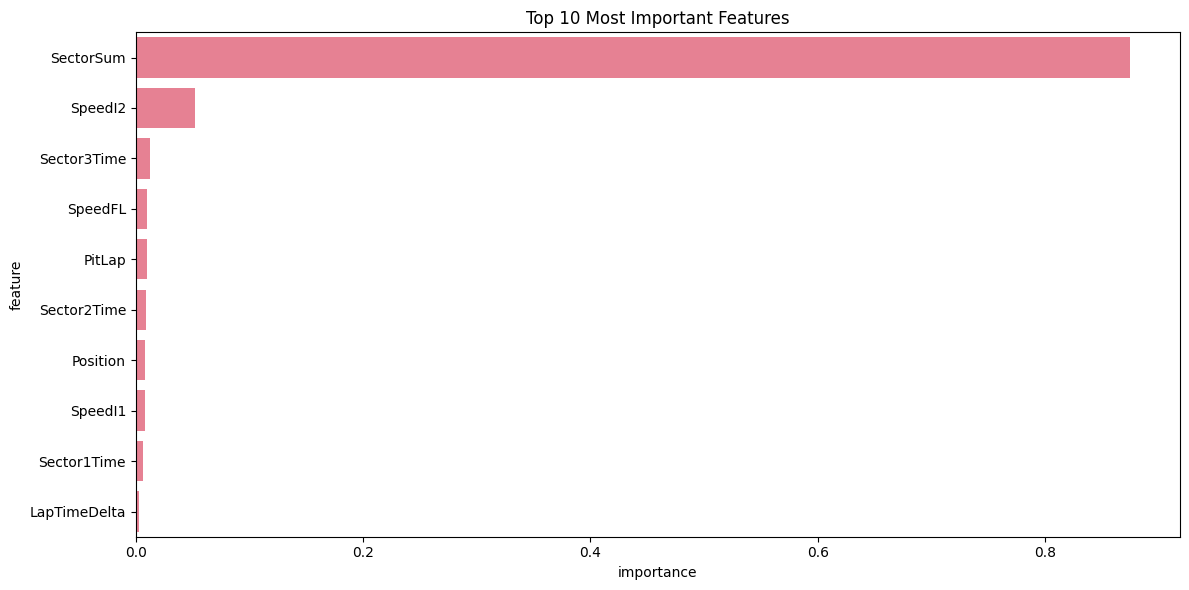

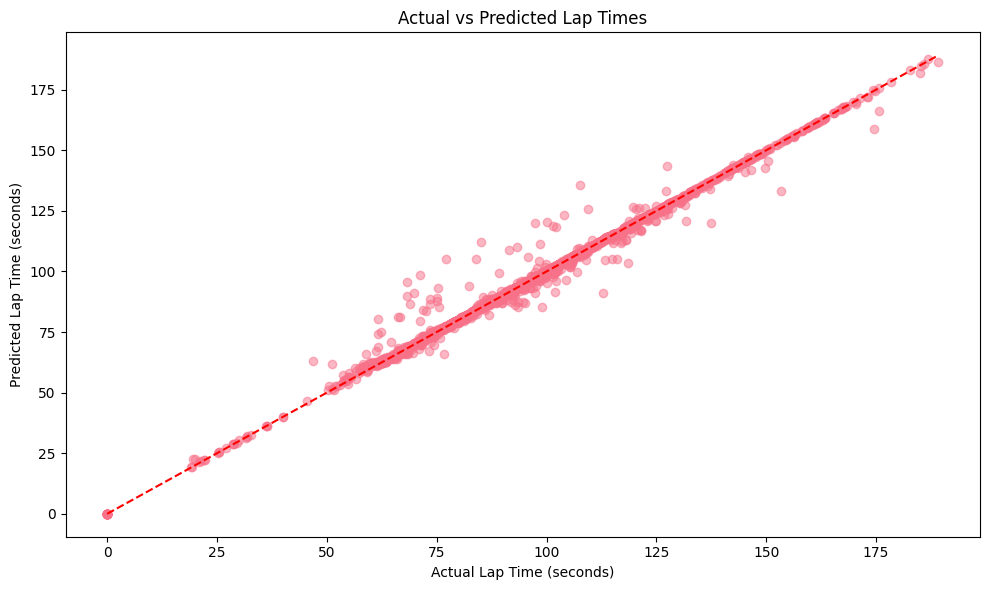

In [6]:
# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Most Important Features')
plt.tight_layout()
plt.show()

# Actual vs Predicted plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Lap Time (seconds)')
plt.ylabel('Predicted Lap Time (seconds)')
plt.title('Actual vs Predicted Lap Times')
plt.tight_layout()
plt.show()

## 6. Model Persistence

In [7]:
# Create models directory if it doesn't exist
models_dir = '../models'
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

# Save the model and scaler
joblib.dump(model, os.path.join(models_dir, 'base_model.joblib'))
joblib.dump(scaler, os.path.join(models_dir, 'scaler.joblib'))

print("Model and scaler saved successfully!")

Model and scaler saved successfully!
